In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import pandas as pd

In [3]:
data = np.loadtxt("dataset_OBD_new.csv",delimiter=",")

In [18]:
data.shape

(1356, 17)

In [19]:
x = data[:,0:16]
y = data[:,16]

# Spliting dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=70,random_state=10)
print(x.shape)
print(y.shape)

(1356, 16)
(1356,)


In [20]:
x_train.shape

(1286, 16)

In [21]:
x_test.shape

(70, 16)

In [22]:
y_test.shape

(70,)

In [23]:
y_train.shape

(1286,)

In [24]:
y_test

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0.])

In [25]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

# Creating the model

In [68]:
model = Sequential()
model.add(Dense(10,input_dim=16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Compiling the model 

In [69]:
learning_rate = 0.0001 
model.compile(loss="binary_crossentropy",metrics=['accuracy'],optimizer=Adam(learning_rate))

# Training 

In [70]:
epochs = 100
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/100
41/41 [==============================] - 0s 3ms/step - loss: 13.7598 - accuracy: 0.8103 - val_loss: 12.1588 - val_accuracy: 0.7714
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 8.2516 - accuracy: 0.7605 - val_loss: 7.2253 - val_accuracy: 0.6286
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 4.9800 - accuracy: 0.6299 - val_loss: 5.4618 - val_accuracy: 0.5000
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 3.9141 - accuracy: 0.6198 - val_loss: 4.5156 - val_accuracy: 0.5286
Epoch 5/100
41/41 [==============================] - ETA: 0s - loss: 4.1058 - accuracy: 0.50 - 0s 1ms/step - loss: 3.2826 - accuracy: 0.6314 - val_loss: 3.8175 - val_accuracy: 0.6429
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 2.7655 - accuracy: 0.6431 - val_loss: 3.2519 - val_accuracy: 0.6286
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 2.3227 - accuracy: 0.6656 - val_loss:

# Ploting 

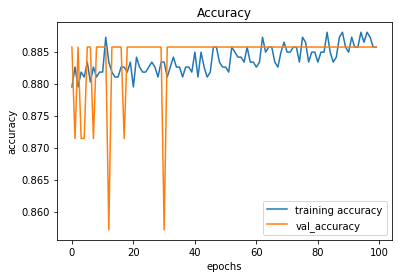

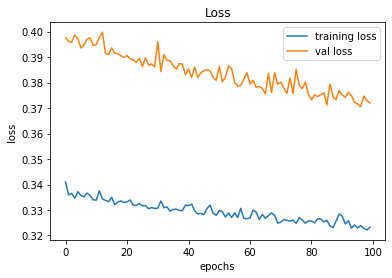

In [42]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import accuracy_score

# prediction on training data
label = np.array(y_train)
pred_train = model.predict_classes(x_train)
print("Accuracy on training data = ",accuracy_score(label,pred_train)*100,"%")

# prediction on test data
label = np.array(y_test)
pred_test = model.predict_classes(x_test)
print("Accuracy on test data = ",accuracy_score(label,pred_test)*100,"%")
print(pred_test.reshape(1,70))
print(label)

Accuracy on training data =  88.4914463452566 %
Accuracy on test data =  88.57142857142857 %
[[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
  0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [44]:
model.save('anomaly_model_new.h5')

# Loading the model

In [4]:
from keras.models import load_model

In [5]:
model = load_model('anomaly_model_new.h5')

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Trying with real world input
samples = np.array([data[6][0:16]])     
samples

array([[-9.77276868e+01,  3.05533156e+01,  2.72402210e+01,
         1.60000000e+01,  2.45000000e+02,  2.57000000e+02,
         3.14770480e+00,  5.95953200e+00,  6.65496100e+00,
        -1.54880880e-02,  8.60000000e+01,  1.92875000e+03,
         3.10000000e+01,  2.11764717e+01,  6.30000000e+01,
         1.60784321e+01]])

In [8]:
prediction = model.predict_classes(samples)
prediction

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1]])

In [58]:
pred = model.predict(samples)
pred

array([[0.98524183]], dtype=float32)

In [61]:
# Trying with real world input
samples = np.array([data[5][0:16]])     
samples

array([[-9.76787399e+01,  3.04948661e+01,  1.53761180e+01,
         2.23000000e+02,  3.29000000e+02,  3.34200000e+02,
        -8.06290500e-01,  6.35677770e+00,  6.40067770e+00,
        -5.77688800e-02,  8.40000000e+01,  8.33500000e+02,
         3.00000000e+01,  3.25490189e+01,  2.65000010e+00,
         1.56862745e+01]])

In [62]:
prediction = model.predict_classes(samples)
prediction

array([[0]])

In [63]:
pred = model.predict(samples)
pred

array([[0.16944236]], dtype=float32)